In [108]:
#Problem 1
#importing torchvison models
from torchvision import models
alexnet = models.AlexNet()
resnet = models.resnet101(pretrained=True)

In [109]:
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [110]:
from torchvision import transforms
preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
        )])

In [111]:
from PIL import Image
img = Image.open("C:/Users/rosam/p1ch2/Meerkat.jpg")

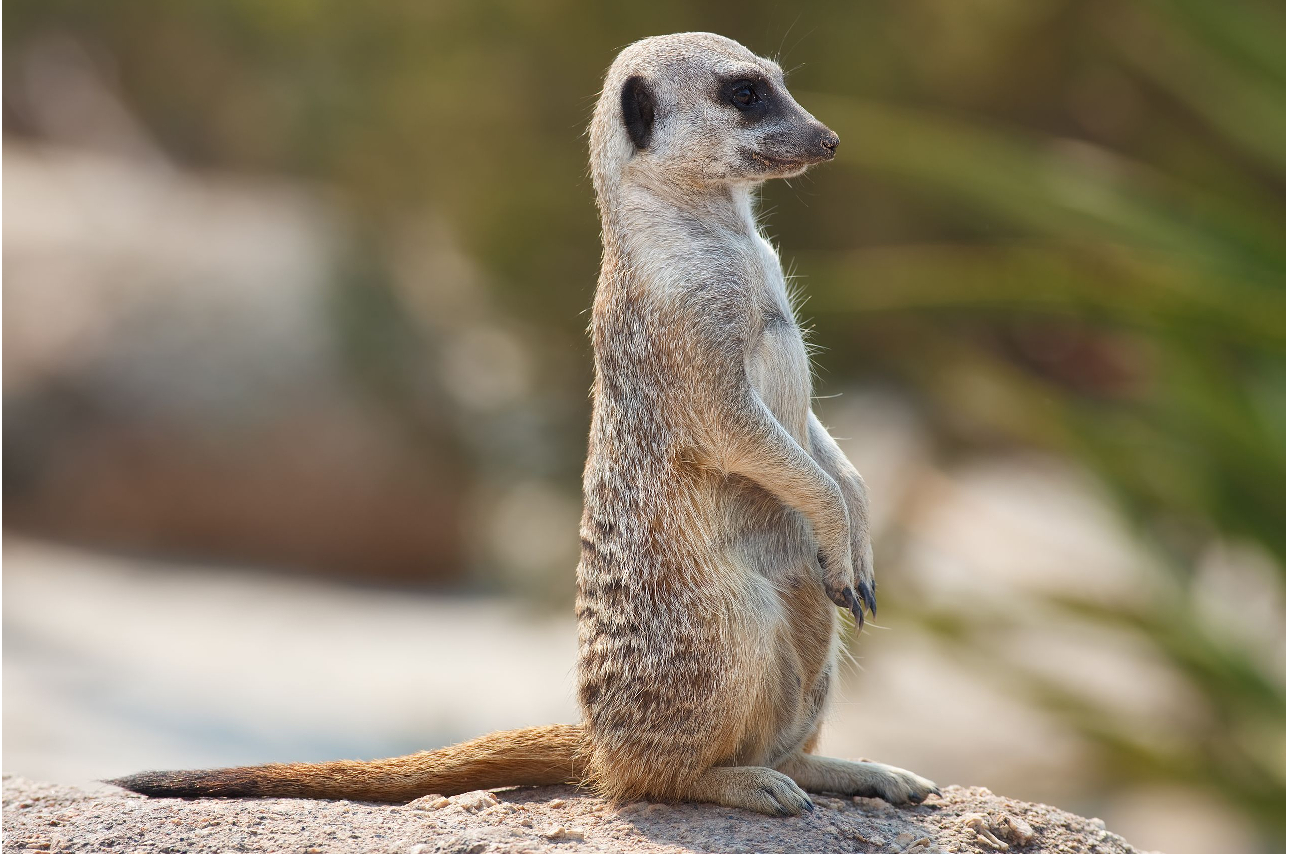

In [112]:
img
#>>> img.show()

In [113]:
img_t = preprocess(img)

In [114]:
import torch
batch_t = torch.unsqueeze(img_t, 0)

In [115]:
resnet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [116]:
out = resnet(batch_t)
out

tensor([[-2.4496e+00, -1.7483e+00, -3.6250e+00, -3.5015e+00, -2.8966e-01,
         -1.0906e+00, -2.3614e+00, -6.2249e-01,  1.4640e+00,  5.5542e+00,
          2.5938e+00,  5.0837e-01,  1.2833e+00,  8.1129e-01, -2.2645e-01,
          1.6919e+00,  1.5561e+00,  1.8706e+00,  1.7862e+00,  1.9003e+00,
          4.8839e-01,  4.7914e+00, -1.2856e+00,  5.2652e+00,  3.1401e+00,
          5.8012e-01,  2.7473e+00,  1.0755e+00,  5.3920e-01,  5.4009e-01,
          9.4716e-01, -4.6258e-01,  2.5136e+00,  7.7419e-01, -2.2056e-01,
          6.6392e-01,  2.5274e+00,  3.3628e-01,  1.6599e+00,  7.4731e-01,
          1.8512e+00,  4.7400e+00,  5.0400e+00,  2.9118e+00,  3.8575e+00,
          1.8196e+00,  1.6687e+00,  1.8759e+00,  1.0962e+00,  1.0757e+00,
         -1.7491e+00, -2.3536e+00,  2.3289e+00,  6.8393e-01,  1.2447e+00,
         -1.1755e+00, -2.1872e+00,  1.3909e+00,  1.1912e+00,  1.7715e+00,
          2.1512e+00, -1.7144e+00,  3.5112e-01,  5.0568e+00,  1.3667e+00,
          8.0257e-01,  3.3266e+00,  1.

In [117]:
with open("C:/Users/rosam/p1ch2/imagenet_classes.txt") as f:
    labels = [line.strip() for line in f.readlines()]

In [118]:
_, index = torch.max(out, 1)

In [119]:
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
labels[index[0]], percentage[index[0]].item()

('meerkat, mierkat', 97.68217468261719)

In [120]:
_, indices = torch.sort(out, descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

[('meerkat, mierkat', 97.68217468261719),
 ('mongoose', 2.3039276599884033),
 ('patas, hussar monkey, Erythrocebus patas', 0.002998271258547902),
 ('marmot', 0.002070529153570533),
 ('Madagascar cat, ring-tailed lemur, Lemur catta', 0.0019975153263658285)]

In [121]:
from PIL import Image
img = Image.open("C:/Users/rosam/p1ch2/blackfootedferret.jpg")

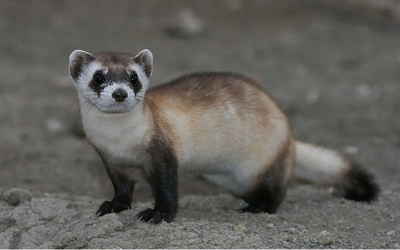

In [122]:
img

In [123]:
img_t = preprocess(img)
import torch
batch_t = torch.unsqueeze(img_t, 0)
resnet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [124]:
out = resnet(batch_t)
out

tensor([[ 1.5421e+00, -2.4936e+00,  5.4455e-01,  8.9768e-01,  1.3321e+00,
          1.0209e+00, -7.1040e-01, -9.8695e-01, -3.2537e-01, -6.5917e-01,
          6.8582e-01, -2.1787e-01, -1.0339e+00, -1.1285e+00, -2.8637e+00,
         -1.3298e+00,  1.2792e-01, -1.1781e-01, -9.5243e-01,  2.8589e-02,
          1.5835e+00,  7.2021e-01, -1.2617e+00,  6.4385e-01, -2.4689e+00,
         -3.2867e-01,  1.5332e+00, -6.4034e-01,  6.6116e-01,  8.2582e-01,
         -4.5478e-01, -2.3385e+00,  6.9301e-01,  1.9799e+00,  3.7548e+00,
          2.4017e+00,  1.4468e+00, -4.7604e-01,  3.6188e+00,  8.0876e-01,
         -1.0654e-01,  2.4090e+00,  2.1701e+00,  2.4288e-01,  1.4929e+00,
          1.6637e+00,  6.7161e-01, -2.2215e-01,  1.7470e+00, -1.7715e+00,
         -1.4920e+00, -1.0509e+00,  1.8759e+00,  2.1773e+00,  1.1408e+00,
         -7.4529e-01,  1.0132e+00,  3.7654e-01,  2.1026e-01,  3.2983e-01,
          3.9017e+00,  1.7304e-01,  1.0123e+00,  3.3320e+00,  1.7777e+00,
          1.2794e+00,  2.4882e+00,  5.

In [125]:
with open("C:/Users/rosam/p1ch2/imagenet_classes.txt") as f:
    labels = [line.strip() for line in f.readlines()]

In [126]:
_, index = torch.max(out, 1)

In [127]:
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
labels[index[0]], percentage[index[0]].item()

('black-footed ferret, ferret, Mustela nigripes', 92.02156066894531)

In [128]:
_, indices = torch.sort(out, descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

[('black-footed ferret, ferret, Mustela nigripes', 92.02156066894531),
 ('weasel', 4.529511451721191),
 ('polecat, fitch, foulmart, foumart, Mustela putorius', 3.0447397232055664),
 ('badger', 0.29000967741012573),
 ('mink', 0.07643627375364304)]

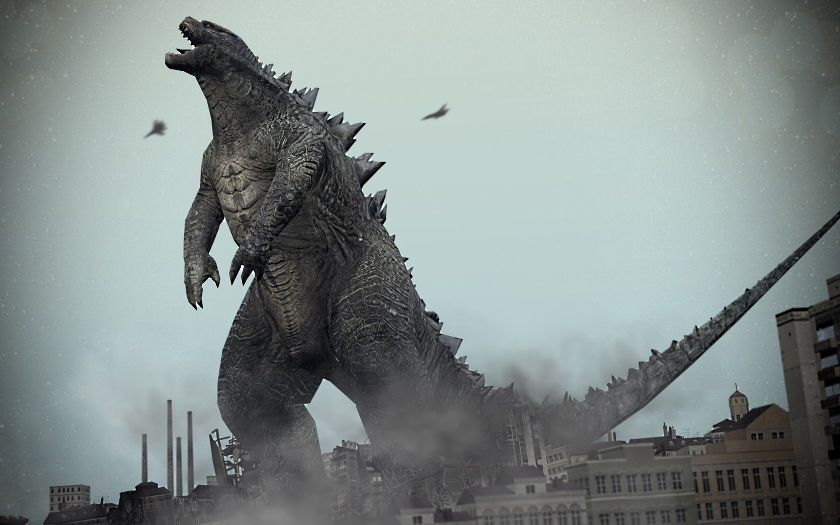

In [129]:
from PIL import Image
img = Image.open("C:/Users/rosam/p1ch2/Godzilla2.jpg")
img

In [130]:
img_t = preprocess(img)
import torch
batch_t = torch.unsqueeze(img_t, 0)
resnet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [131]:
out = resnet(batch_t)
out

tensor([[-3.5722e-01, -8.2891e-01,  1.9729e+00,  1.7715e+00,  1.7224e-01,
         -3.4300e-01, -6.4193e-01,  2.0416e+00,  1.8040e+00, -3.8230e-01,
          1.8414e-01, -1.6679e-01,  6.4485e-01,  6.3345e-01, -2.4624e-01,
          1.0592e+00,  1.1251e+00,  5.2050e-01,  7.2675e-01, -2.6679e-01,
          1.8260e+00,  1.7030e+00,  2.9559e+00,  4.7962e+00,  3.1359e+00,
          1.8160e-01,  1.5716e+00,  6.1038e-01,  5.6805e-01,  1.9810e+00,
          9.1124e-01, -9.2150e-01,  7.1403e-01,  1.4989e-01,  1.6789e+00,
          1.8387e+00,  1.7818e+00,  2.7195e-01,  5.0471e+00,  9.3966e+00,
          2.5696e+00,  3.8894e+00,  4.9436e+00,  7.0834e+00,  4.7790e+00,
          2.5589e+00,  4.6608e+00,  3.5539e+00,  4.9309e+00,  4.7484e+00,
          6.2817e+00,  9.0834e+00, -2.6123e+00, -1.9942e+00, -1.5527e+00,
         -1.9237e+00, -7.0044e-01, -2.9656e+00, -2.3764e-01, -1.6254e+00,
         -8.4077e-01, -1.9185e+00, -8.3365e-01, -7.6503e-01, -5.3906e-01,
         -6.1765e-01,  8.8691e-02, -2.

In [132]:
with open("C:/Users/rosam/p1ch2/imagenet_classes.txt") as f:
    labels = [line.strip() for line in f.readlines()]

In [133]:
_, index = torch.max(out, 1)
_, indices = torch.sort(out, descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

[('common iguana, iguana, Iguana iguana', 5.3479511734622065e-06),
 ('triceratops', 8.32783200621634e-07),
 ('frilled lizard, Chlamydosaurus kingi', 3.036906264242134e-06),
 ('American alligator, Alligator mississipiensis', 5.357606482903066e-07),
 ('banded gecko', 8.883626287570223e-05)]

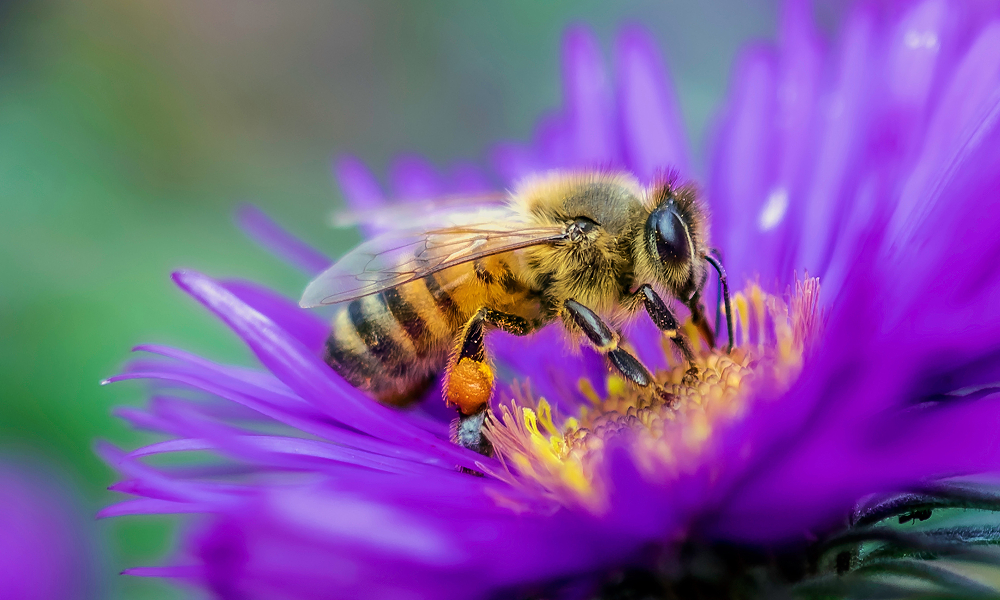

In [134]:
from PIL import Image
img = Image.open("C:/Users/rosam/p1ch2/Bees.jpg")
img

In [135]:
img_t = preprocess(img)
import torch
batch_t = torch.unsqueeze(img_t, 0)
resnet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [136]:
out = resnet(batch_t)
out

tensor([[-2.4185e+00,  4.4776e-01, -8.0227e-01, -4.1715e+00, -3.4756e+00,
         -2.1345e+00, -3.0521e+00,  1.3323e+00, -4.2895e-01,  2.3945e+00,
          1.2658e+00,  1.7571e+00, -8.1161e-01, -1.9515e+00, -5.0285e-01,
         -1.2394e-01, -3.7314e-01, -3.6658e-01, -2.0890e+00,  1.3539e+00,
         -2.6642e+00, -4.2841e-01, -1.1882e+00,  2.9880e-01,  7.7039e-01,
         -3.5946e-01,  1.9519e-01, -9.0891e-01, -5.9422e-02, -8.1961e-01,
          4.1398e-01, -2.4688e+00,  1.3397e-01, -6.8906e-01, -1.9003e+00,
         -1.9639e+00,  9.3722e-01, -4.4277e-01, -8.5676e-02, -6.3801e-01,
         -1.7945e+00,  2.9367e-01, -9.3439e-01,  1.5082e+00, -3.3542e-01,
          4.3275e-01, -1.2593e+00, -1.3542e+00, -2.2810e+00,  4.6670e-01,
         -3.1111e+00,  5.0868e-01, -1.3070e-01,  6.4436e-01, -9.1720e-02,
         -2.3221e+00, -1.5301e+00, -6.7453e-01,  5.9446e-01, -2.3234e-01,
          6.8312e-02, -1.7997e+00,  9.7577e-01,  1.3510e+00, -2.0538e+00,
          8.9251e-01,  1.1828e+00, -9.

In [137]:
_, index = torch.max(out, 1)
_, indices = torch.sort(out, descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

[('bee', 2.576592578407144e-06),
 ('cardoon', 1.6098921378215891e-06),
 ('honeycomb', 8.882815905053576e-08),
 ('apiary, bee house', 2.0347934892583908e-08),
 ('fly', 9.398625024914509e-07)]

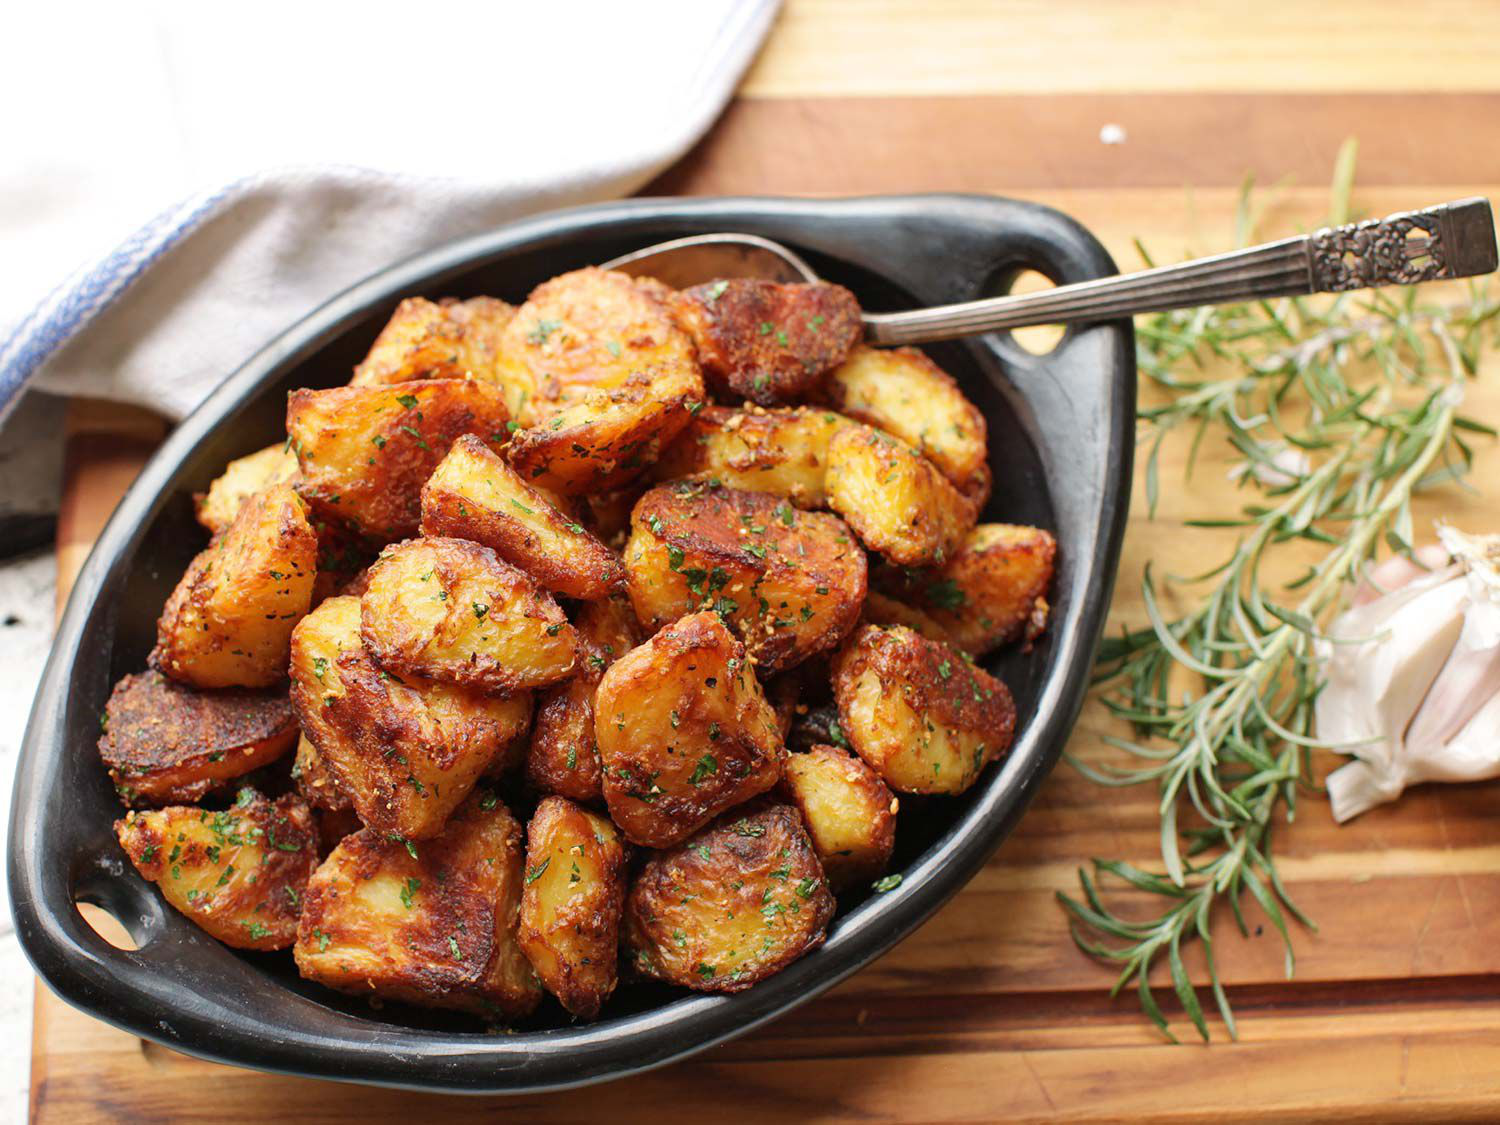

In [138]:
from PIL import Image
img = Image.open("C:/Users/rosam/p1ch2/potaotes.jpg")
img

In [139]:
img_t = preprocess(img)
import torch
batch_t = torch.unsqueeze(img_t, 0)
resnet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [140]:
out = resnet(batch_t)
out

tensor([[ 1.1480e+00, -6.2519e-01, -2.0419e+00, -3.5865e+00, -3.1982e+00,
          3.7421e-01, -2.7006e+00, -1.4272e+00,  5.7302e-01, -1.8235e+00,
          1.7676e-01, -1.0306e+00,  2.8618e+00, -1.6608e+00, -7.3155e-01,
         -9.5506e-01, -1.2161e+00, -7.6235e-01, -8.4376e-01,  3.3298e-01,
         -1.6286e+00, -9.7814e-01, -2.4585e+00,  1.3024e+00, -2.4074e+00,
         -3.9339e-01, -1.6802e-01,  7.6119e-01,  3.6286e-02, -2.0192e+00,
         -1.6392e+00, -7.3338e-01,  8.2704e-01, -1.7378e+00, -1.1896e+00,
          3.1769e-01, -5.6517e-01,  4.2118e-01, -7.3123e-02, -4.8275e-01,
          4.9106e-01,  1.4947e-02,  3.6153e-01,  3.3663e-01, -1.2040e+00,
          1.0014e+00, -2.5961e+00,  3.3702e-01, -1.8406e+00, -2.0544e+00,
         -3.4741e+00, -7.4187e-01, -3.4521e-01,  1.8695e+00, -5.8916e-01,
         -3.0219e+00, -2.2057e-01, -1.9208e+00, -1.5466e+00,  7.2319e-01,
          2.4384e-01, -3.3389e-01, -1.0444e+00,  6.2524e-02, -7.6753e-01,
         -1.5495e+00, -2.7583e-01, -1.

In [141]:
_, index = torch.max(out, 1)
_, indices = torch.sort(out, descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

[('hot pot, hotpot', 1.6366326462957659e-06),
 ('butternut squash', 2.2126837393443566e-06),
 ('frying pan, frypan, skillet', 8.31046054372564e-06),
 ('acorn squash', 5.900903374822519e-07),
 ('wok', 8.562218681618106e-06)]

In [157]:
#Problem 3
import torchvision.models as models
import torch
from ptflops import get_model_complexity_info

In [158]:
#with torch.cuda.device(0):
#  net = alexnet
#  macs, params = get_model_complexity_info(net, (3, 224, 224), as_strings=True,
#                                           print_per_layer_stat=True, verbose=True)
#  print('{:<30}  {:<8}'.format('Computational complexity: ', macs))
#  print('{:<30}  {:<8}'.format('Number of parameters: ', params))

In [159]:
#Problem 4
import torch
model = torch.hub.load('pytorch/vision:v0.10.0', 'mobilenet_v2', pretrained=True)
model.eval()

Using cache found in C:\Users\rosam/.cache\torch\hub\pytorch_vision_v0.10.0


MobileNetV2(
  (features): Sequential(
    (0): ConvBNActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=1e-05, momen

In [160]:
#first image
filename = "C:/Users/rosam/p1ch2/Meerkat.jpg"

In [161]:
# sample execution (requires torchvision)
from PIL import Image
from torchvision import transforms
input_image = Image.open(filename)
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad():
    output = model(input_batch)
# Tensor of shape 1000, with confidence scores over Imagenet's 1000 classes
print(output[0])
# The output has unnormalized scores. To get probabilities, you can run a softmax on it.
probabilities = torch.nn.functional.softmax(output[0], dim=0)
print(probabilities)

tensor([-7.3578e+00, -5.1625e+00, -4.9067e+00, -6.1779e+00,  6.0212e-01,
        -5.6050e+00, -7.9184e+00,  9.1021e-01,  2.5996e+00,  8.3218e+00,
         5.6761e+00,  2.7907e+00,  1.8426e+00,  7.3920e-01, -5.7210e-01,
         3.4932e+00,  2.6550e-01,  4.5247e+00,  1.2576e+00,  5.4612e+00,
         9.8467e-01,  6.1465e+00, -5.2737e+00,  4.9821e+00,  4.9682e+00,
        -4.4925e-01,  1.8646e+00, -1.7119e+00, -2.5740e+00, -6.1627e-01,
        -1.8203e+00, -3.4019e-01,  1.8162e+00, -2.5676e-01,  2.6565e-01,
        -2.1451e+00, -4.1427e-01, -1.7919e+00,  8.0496e-01,  3.3259e-01,
         1.0090e+00,  2.9321e+00,  3.5181e+00,  3.6498e+00,  2.6785e+00,
         1.7925e+00,  7.2904e-01,  2.3660e+00,  2.9896e+00, -1.7163e+00,
        -4.3259e+00, -3.7356e+00,  2.0013e+00, -1.0687e+00,  1.9210e+00,
        -4.1028e+00, -4.6334e+00, -1.6233e+00, -9.8406e-01, -1.0123e+00,
         1.0765e+00,  1.1756e+00,  1.3070e+00,  6.0171e+00, -1.9539e+00,
        -1.8075e+00,  1.6784e+00,  2.2309e+00, -8.8

In [162]:
# Download ImageNet labels
!wget https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt

--2022-01-27 01:03:09--  https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10472 (10K) [text/plain]
Saving to: 'imagenet_classes.txt.4'

     0K ..........                                            100% 8.09K=1.3s

2022-01-27 01:03:11 (8.09 KB/s) - 'imagenet_classes.txt.4' saved [10472/10472]



In [163]:
# Read the categories
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]
# Show top categories per image
top5_prob, top5_catid = torch.topk(probabilities, 5)
for i in range(top5_prob.size(0)):
    print(categories[top5_catid[i]], top5_prob[i].item())


meerkat 0.992443859577179
mongoose 0.007554197683930397
wallaby 7.20884258953447e-07
marmot 5.266763309919043e-07
Madagascar cat 2.444579649818479e-07


In [164]:
#second image
filename = "C:/Users/rosam/p1ch2/blackfootedferret.jpg"
input_image = Image.open(filename)
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0)
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad():
    output = model(input_batch)
# Tensor of shape 1000, with confidence scores over Imagenet's 1000 classes
print(output[0])
# The output has unnormalized scores. To get probabilities, you can run a softmax on it.
probabilities = torch.nn.functional.softmax(output[0], dim=0)
print(probabilities)

tensor([ 1.3225e+00, -7.4390e-02, -1.1655e+00, -2.8274e+00,  1.0056e-01,
         1.4237e+00, -1.0842e+00, -3.2071e+00, -8.4537e-01, -4.9849e-01,
        -5.5827e-01, -2.7073e+00, -4.7443e+00, -1.6648e+00, -7.3439e+00,
        -4.0843e+00,  3.7205e-01,  6.0769e-01, -2.9868e-01, -2.2101e-01,
         1.1745e+00,  1.4713e-01, -4.3324e+00,  2.6713e+00, -4.7761e+00,
         1.2820e+00, -2.6816e-01, -1.3763e+00,  1.9429e+00, -3.6121e-01,
         1.7975e+00, -1.7369e+00,  1.6060e+00,  2.6431e+00,  6.5168e+00,
         3.5375e+00,  4.3241e+00,  2.8925e+00,  5.4336e+00,  4.2954e-01,
        -3.0348e+00, -2.0886e+00,  7.4235e-01, -8.2427e-01,  1.4040e+00,
         3.2311e+00, -2.2445e+00,  2.3551e+00,  3.4812e+00, -3.7666e+00,
        -2.9678e+00,  4.6318e-01,  1.4416e+00,  3.3975e+00,  4.5686e+00,
        -2.8848e-01,  8.0295e-01, -4.3183e-01,  3.6077e+00, -6.0619e-01,
         4.0464e+00,  1.0050e+00,  1.8901e+00,  6.9164e+00,  1.0452e-01,
         2.2555e+00,  2.2250e+00,  3.7325e+00,  1.6

In [165]:
# Read the categories
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]
# Show top categories per image
top5_prob, top5_catid = torch.topk(probabilities, 5)
for i in range(top5_prob.size(0)):
    print(categories[top5_catid[i]], top5_prob[i].item())

black-footed ferret 0.8460178375244141
weasel 0.100087970495224
polecat 0.04828725382685661
badger 0.0035945367999374866
Siamese cat 0.0013173703337088227


In [166]:
#third image
filename = "C:/Users/rosam/p1ch2/Godzilla2.jpg"
input_image = Image.open(filename)
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0)
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad():
    output = model(input_batch)
# Tensor of shape 1000, with confidence scores over Imagenet's 1000 classes
print(output[0])
# The output has unnormalized scores. To get probabilities, you can run a softmax on it.
probabilities = torch.nn.functional.softmax(output[0], dim=0)
print(probabilities)

tensor([-2.1748e+00, -1.8177e+00,  6.7227e-01,  2.3187e+00,  7.7088e-01,
        -2.3172e-01, -8.2433e-01,  2.6124e-01,  2.1999e+00, -1.9577e+00,
        -2.9272e+00, -2.5297e+00, -1.9598e+00, -3.8662e-01, -4.0859e+00,
         1.4041e+00,  5.9320e-01, -1.4600e+00,  1.2053e+00, -1.8731e+00,
         3.1426e+00,  9.4618e-01,  1.0849e+00,  1.3939e+00,  4.8599e+00,
         2.5997e-01,  1.0548e+00,  8.1743e-02, -9.2966e-01,  1.9467e+00,
         1.8060e+00,  1.6985e+00,  2.0896e+00,  1.0737e+00,  2.4307e+00,
         2.1011e+00,  1.4641e+00, -1.7289e+00,  4.2916e+00,  7.9660e+00,
         2.6975e+00,  2.0568e+00,  3.7997e+00,  5.7666e+00,  3.4607e+00,
         1.3723e+00,  2.3714e+00,  2.8096e+00,  5.9824e+00,  5.5908e+00,
         5.9164e+00,  7.8646e+00, -4.0185e+00, -4.0902e+00, -1.1601e+00,
        -8.3532e-01, -3.2081e+00, -6.6065e+00, -5.0409e-01, -9.3206e-01,
        -2.0821e+00, -1.9239e+00, -2.3051e+00, -1.8733e+00, -3.9694e-01,
        -7.3729e-01, -2.0132e-01,  6.9410e-02, -1.2

In [167]:
# Read the categories
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]
# Show top categories per image
top5_prob, top5_catid = torch.topk(probabilities, 5)
for i in range(top5_prob.size(0)):
    print(categories[top5_catid[i]], top5_prob[i].item())

African elephant 0.16932207345962524
tusker 0.16434265673160553
common iguana 0.11648844182491302
triceratops 0.10525640845298767
Indian elephant 0.06937571614980698


In [168]:
#fourth image
filename = "C:/Users/rosam/p1ch2/Bees.jpg"
input_image = Image.open(filename)
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0)
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad():
    output = model(input_batch)
# Tensor of shape 1000, with confidence scores over Imagenet's 1000 classes
print(output[0])
# The output has unnormalized scores. To get probabilities, you can run a softmax on it.
probabilities = torch.nn.functional.softmax(output[0], dim=0)
print(probabilities)

tensor([-1.8930e+00,  2.9893e+00, -2.2288e+00, -4.7163e+00, -5.1818e+00,
         8.9376e-01, -2.3849e+00,  8.3593e-01, -1.5641e+00,  2.5839e-01,
         4.6199e+00,  4.3734e+00, -9.7754e-01, -2.3086e+00,  2.9390e+00,
         4.3776e+00,  2.8951e+00,  3.9040e-01, -3.4233e+00,  2.0769e+00,
        -2.3135e+00, -8.2294e-01, -3.2714e-01,  2.1731e-01, -1.4655e+00,
         3.6909e+00,  6.7474e+00,  3.4819e+00,  3.8170e+00,  4.3949e+00,
         3.1261e+00, -7.0060e-01,  4.0235e+00,  2.5760e+00, -3.2404e-01,
         2.5615e+00,  6.4190e+00,  5.0557e+00,  4.2497e+00,  3.6131e+00,
        -1.6323e+00,  1.9308e+00, -1.7840e-01,  2.0556e+00,  2.8561e+00,
         4.0467e+00,  9.7034e-01, -1.1641e+00, -1.9168e+00,  1.1339e-01,
        -2.1768e-01,  1.1967e+00,  2.1083e+00,  3.9987e+00,  1.7998e+00,
        -5.6984e-02,  1.0095e+00,  4.4915e-01,  4.3650e+00, -3.1083e-01,
         2.1029e+00,  1.8933e+00,  3.3077e+00,  2.1609e+00, -4.0556e-01,
         2.4801e+00,  3.2575e+00,  7.2036e-01,  1.7

tensor([7.2411e-11, 9.5542e-09, 5.1759e-11, 4.3021e-12, 2.7010e-12, 1.1752e-09,
        4.4276e-11, 1.1091e-09, 1.0061e-10, 6.2253e-10, 4.8791e-08, 3.8130e-08,
        1.8088e-10, 4.7790e-11, 9.0848e-09, 3.8291e-08, 8.6949e-09, 7.1038e-10,
        1.5675e-11, 3.8366e-09, 4.7556e-11, 2.1113e-10, 3.4663e-10, 5.9748e-10,
        1.1104e-10, 1.9269e-08, 4.0954e-07, 1.5636e-08, 2.1859e-08, 3.8962e-08,
        1.0954e-08, 2.3860e-10, 2.6874e-08, 6.3197e-09, 3.4771e-10, 6.2287e-09,
        2.9489e-07, 7.5443e-08, 3.3693e-08, 1.7828e-08, 9.3983e-11, 3.3151e-09,
        4.0222e-10, 3.7557e-09, 8.3623e-09, 2.7506e-08, 1.2687e-09, 1.5011e-10,
        7.0713e-11, 5.3850e-10, 3.8673e-10, 1.5910e-09, 3.9590e-09, 2.6215e-08,
        2.9081e-09, 4.5414e-10, 1.3194e-09, 7.5337e-10, 3.7812e-08, 3.5233e-10,
        3.9373e-09, 3.1929e-09, 1.3136e-08, 4.1728e-09, 3.2049e-10, 5.7414e-09,
        1.2492e-08, 9.8808e-10, 2.8366e-09, 3.9315e-10, 3.4793e-09, 2.0513e-07,
        2.0326e-08, 6.3265e-07, 2.3287e-

In [169]:
# Read the categories
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]
# Show top categories per image
top5_prob, top5_catid = torch.topk(probabilities, 5)
for i in range(top5_prob.size(0)):
    print(categories[top5_catid[i]], top5_prob[i].item())

bee 0.9983798265457153
cardoon 0.0013360300799831748
fly 0.00021647009998559952
ladybug 1.202896692120703e-05
honeycomb 1.0238179129373748e-05


In [170]:
#fifth image
filename = "C:/Users/rosam/p1ch2/potaotes.jpg"
input_image = Image.open(filename)
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0)
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad():
    output = model(input_batch)
# Tensor of shape 1000, with confidence scores over Imagenet's 1000 classes
print(output[0])
# The output has unnormalized scores. To get probabilities, you can run a softmax on it.
probabilities = torch.nn.functional.softmax(output[0], dim=0)
print(probabilities)

tensor([ 5.6122e-01,  4.7114e-01, -3.1047e+00, -6.8589e+00, -1.9522e+00,
        -1.4834e+00, -3.0401e+00, -4.3986e+00, -2.8028e+00, -3.5968e-01,
        -1.1289e+00, -1.3266e+00, -6.5011e-01, -2.2130e+00, -3.0084e+00,
        -2.4431e+00, -2.8075e+00, -1.9808e+00,  3.6959e-01, -3.3957e-01,
        -4.3099e+00, -1.6145e+00, -3.6561e+00, -2.2158e+00, -5.4961e+00,
        -2.0967e+00, -2.9999e+00, -1.9883e+00, -2.5847e+00, -1.2467e+00,
        -2.7619e+00, -9.5204e-01,  5.9717e-01, -1.0406e+00, -2.0025e+00,
        -1.7037e+00, -2.5035e+00, -1.1166e+00, -2.9943e+00, -3.2231e+00,
        -8.6268e-01, -1.1427e+00, -3.9338e+00, -2.7676e+00, -4.3386e+00,
        -1.0936e+00, -4.0244e+00, -2.0709e+00, -4.4385e+00, -5.7485e+00,
        -6.1789e+00, -2.1540e+00, -6.7943e-01,  1.5749e+00, -3.0358e+00,
        -4.1454e+00, -3.0557e+00, -3.2753e+00, -2.0528e+00,  6.7464e-01,
         9.6040e-02, -1.8114e+00, -1.3549e+00, -1.4325e+00, -2.8303e+00,
        -4.1324e+00, -2.3379e+00, -2.1657e+00, -2.3

In [171]:
# Read the categories
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]
# Show top categories per image
top5_prob, top5_catid = torch.topk(probabilities, 5)
for i in range(top5_prob.size(0)):
    print(categories[top5_catid[i]], top5_prob[i].item())

frying pan 0.5027724504470825
acorn squash 0.13261805474758148
butternut squash 0.12251381576061249
Dutch oven 0.06366252154111862
spatula 0.049628108739852905
